<a href="https://colab.research.google.com/github/enzhouliu/fast.ai/blob/main/bag_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 2.7 MB/s 
     |████████████████████████████████| 186 kB 43.7 MB/s 
     |████████████████████████████████| 1.2 MB 29.8 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 51 kB 253 kB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *
import os
key = os.environ.get('AZURE_SEARCH_KEY', '6b462b12552046459c8dc1fe2f80674f')

In [ ]:
result = search_images_bing(key, "gucci bag")

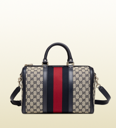

In [ ]:
imgs = result.attrgot('contentUrl')
dest = 'image/handbags/gucci.jpg'
download_url(imgs[1], dest)
img = Image.open(dest)
img.to_thumb(128,128)

In [3]:
bag_brands = 'gucci', 'hermes', 'burberry'
path = Path('bags')
if not path.exists():
  path.mkdir()
for o in bag_brands:
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  results = search_images_bing(key, f'{o} bag')
  download_images(dest, urls=results.attrgot('contentUrl'))

In [4]:
fns = get_image_files(path)
failed = verify_images(fns)
len(failed)
failed.map(Path.unlink)

(#3) [None,None,None]

In [5]:
bags = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(128))

In [6]:
dls = bags.dataloaders(path)

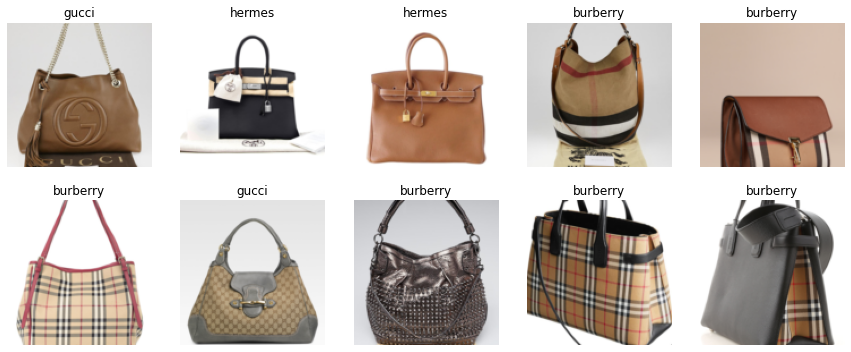

In [7]:
dls.valid.show_batch(max_n=10, nrows=2)

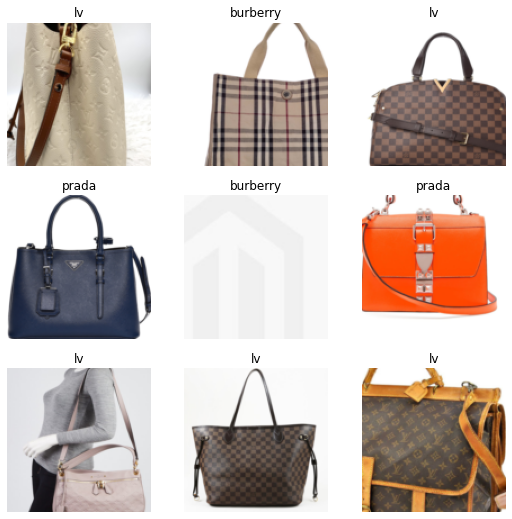

In [ ]:
handbags = bags.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = handbags.dataloaders(path)
dls.train.show_batch()

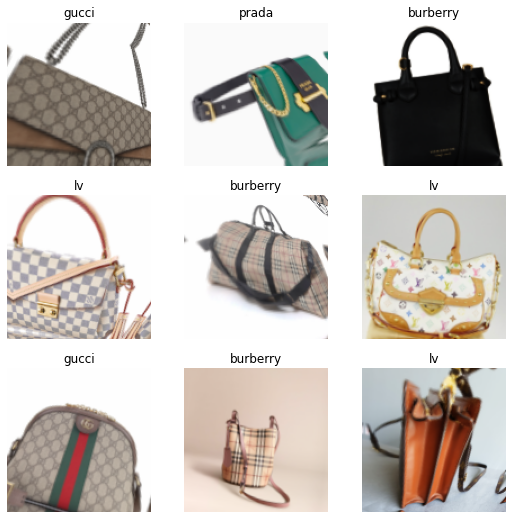

In [ ]:
handbags = bags.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = handbags.dataloaders(path)
dls.train.show_batch()

In [11]:
handbags = bags.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = handbags.dataloaders(path)
dls

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.824043,1.574624,0.500000,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.891348,0.902287,0.300000,00:20
1,0.641444,0.581028,0.214286,00:20
2,0.507719,0.464676,0.185714,00:19
3,0.438260,0.407372,0.142857,00:20


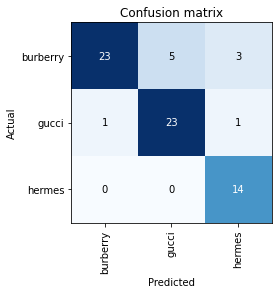

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

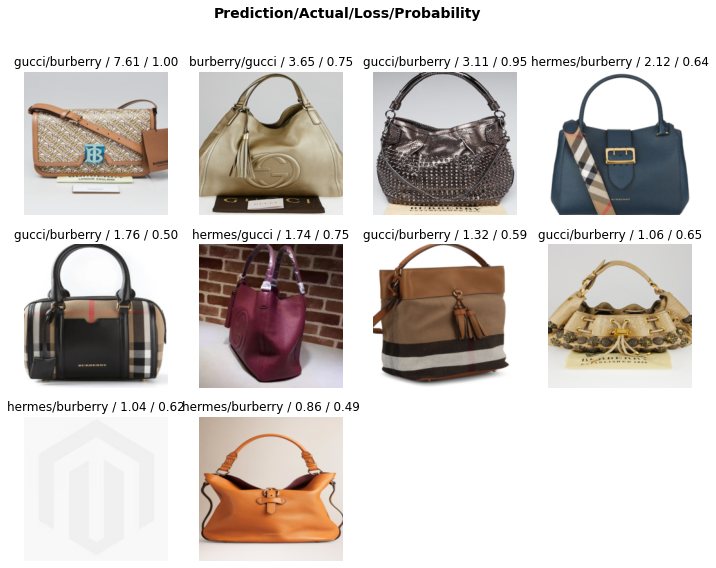

In [14]:
interp.plot_top_losses(10)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for index in cleaner.delete(): cleaner.fns[idx].unlink()    

In [15]:
learn.export()
path = Path()
